<a href="https://colab.research.google.com/github/harishmaduraimani/FundReturns/blob/main/FundReturns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Cleaning Process downloaded data of Nav from AMFI web (2023-2025)**
| Step                 | Purpose                                    |
| -------------------- | ------------------------------------------ |
| Combine all files    | Create single dataset                      |
| Remove unwanted rows | Remove headers, separators, empty rows     |
| Standardize columns  | Ensure uniform names, numeric NAV          |
| Filter Growth NAV    | Focus on actual reinvested growth only     |
| Handle missing NAV   | Remove invalid values, convert to float    |
| Aggregate monthly    | Simplify to month-end NAV for modeling     |
| Sort & check         | Ensure data consistency, remove duplicates |



#    **Mutual Fund Returns Predictor using historical NAV:**


Predict your future fund value for Lump Sum or SIP investments.

Focus on **Aditya Birla Sun Life Direct** Growth NAV.

**Core Idea:**

The NAV sequence encodes fund growth.Using past NAV trends,
* the ML model learns patterns.

* You can then simulate returns for any input amount.

Lets use **Random Forest Regressor (RFR)** from sklearn.

Why RFR?

Handles non-linear trends in NAV well.

Robust to small datasets (we only have 2023 data).

Provides good predictions without heavy tuning.

In [ ]:
#Start coding for predictor for funds returns

**Import Libaries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


**Load & Clean Data**

In [20]:
# Correct
df = pd.read_excel("/content/ABSL_NAV_Clean.xlsx", engine='openpyxl')
df = df[df["Scheme Name"].str.contains("Direct Growth")]
df["Date"] = pd.to_datetime(df["Date"])
monthly_nav = df.set_index("Date").resample('ME').last()[["Net Asset Value"]]
monthly_nav.rename(columns={"Net Asset Value":"NAV"}, inplace=True)
monthly_nav



,NAV
Date,
2023-01-31,10.0852
2023-02-28,9.9932
2023-03-31,10.0571
2023-04-30,10.1642
2023-05-31,10.2527
2023-06-30,10.2492
2023-07-31,10.2784
2023-08-31,10.3387
2023-09-30,10.3705


**Visualize the**  **Trends**

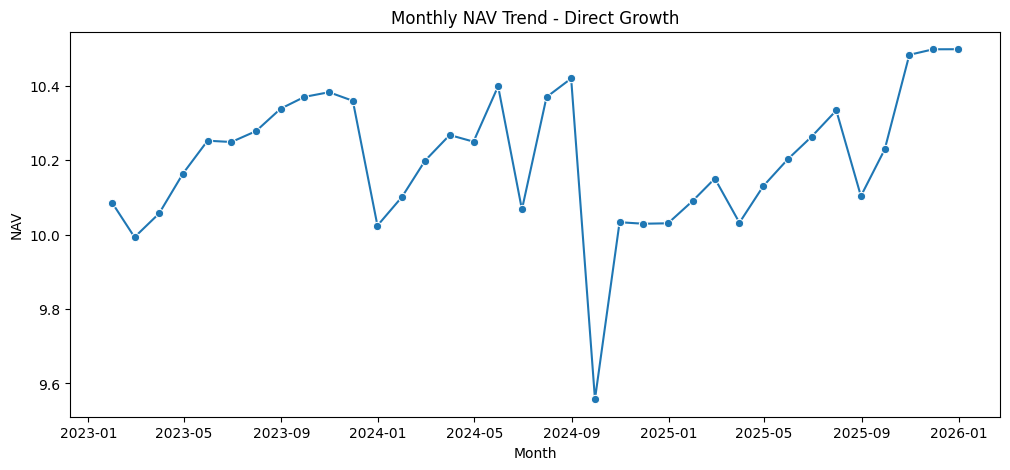

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_nav, x=monthly_nav.index, y="NAV", marker="o")
plt.title("Monthly NAV Trend - Direct Growth")
plt.ylabel("NAV")
plt.xlabel("Month")
plt.show()


In [ ]:
monthly_nav["NAV_lag1"] = monthly_nav["NAV"].shift(1)
monthly_nav["NAV_lag2"] = monthly_nav["NAV"].shift(2)
monthly_nav["NAV_lag3"] = monthly_nav["NAV"].shift(3)
monthly_nav=monthly_nav.dropna()
monthly_nav

,NAV,NAV_lag1,NAV_lag2,NAV_lag3
Date,,,,
2023-04-30,10.1642,10.0571,9.9932,10.0852
2023-05-31,10.2527,10.1642,10.0571,9.9932
2023-06-30,10.2492,10.2527,10.1642,10.0571
2023-07-31,10.2784,10.2492,10.2527,10.1642
2023-08-31,10.3387,10.2784,10.2492,10.2527
2023-09-30,10.3705,10.3387,10.2784,10.2492
2023-10-31,10.3831,10.3705,10.3387,10.2784
2023-11-30,10.3600,10.3831,10.3705,10.3387
2023-12-31,10.0244,10.3600,10.3831,10.3705


**Define Features & Target**

In [ ]:
X = monthly_nav[["NAV_lag1","NAV_lag2","NAV_lag3"]]
Y = monthly_nav["NAV"]


**Train-Test Split & Model Training**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True)
model=RandomForestRegressor(n_estimators=500,random_state=42)
model.fit(X_train,Y_train)
pred= model.predict(X_test)
mae=mean_absolute_error(Y_test,pred)
print("MAE:",round(mae,2))



MAE: 0.08


**FULL FIXED FUTURE NAV LOOP**

In [ ]:
future_navs = []

lag1 = monthly_nav["NAV"].iloc[-1]
lag2 = monthly_nav["NAV"].iloc[-2]
lag3 = monthly_nav["NAV"].iloc[-3]

for _ in range(36):  # 3 years
    X_future = pd.DataFrame(
        [[lag1, lag2, lag3]],
        columns=["NAV_lag1", "NAV_lag2", "NAV_lag3"]
    )

    next_nav = model.predict(X_future)[0]
    future_navs.append(next_nav)

    lag3 = lag2
    lag2 = lag1
    lag1 = next_nav

predicted_final_nav = future_navs[-1]


**LUMP SUM**

In [ ]:
investment = 10000
current_nav = monthly_nav["NAV"].iloc[-1]

units = investment / current_nav
final_value_lump_ml = units * predicted_final_nav

print("📊 ML Lump Sum Value (3 Years):", round(final_value_lump_ml, 2))
print("📈 ML Lump Sum Return %:",
      round(((final_value_lump_ml / investment) - 1) * 100, 2))


📊 ML Lump Sum Value (3 Years): 9824.9
📈 ML Lump Sum Return %: -1.75


**SIP**

In [ ]:
monthly_sip = 500
sip_months = 36

sip_units = []

for nav in future_navs:
    sip_units.append(monthly_sip / nav)

total_units = sum(sip_units)
final_value_sip_ml = total_units * predicted_final_nav

total_invested = monthly_sip * sip_months

print(" Total Invested:", total_invested)
print(" ML SIP Value after 3 Years:", round(final_value_sip_ml, 2))
print(" ML SIP Return %:",
      round(((final_value_sip_ml / total_invested) - 1) * 100, 2))


 Total Invested: 18000
 ML SIP Value after 3 Years: 17997.64
 ML SIP Return %: -0.01


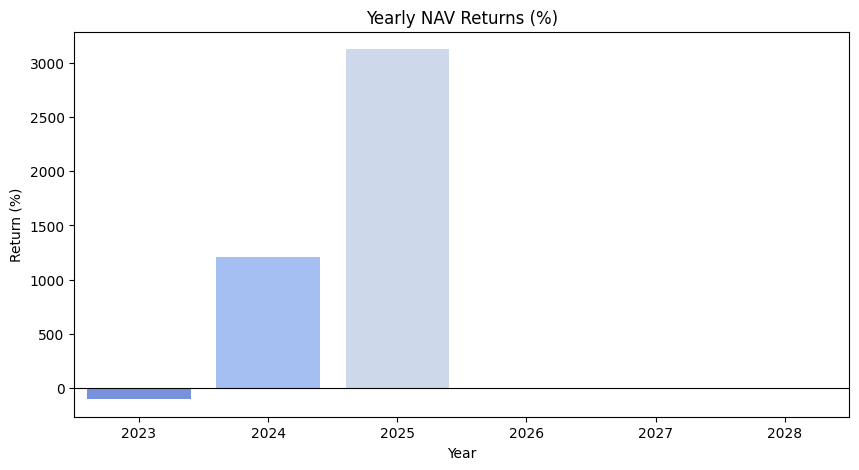

In [19]:
# Combine historical + predicted NAVs
historical_nav = df[["Date", "Net Asset Value"]].copy()

future_dates = pd.date_range(
    start=historical_nav["Date"].iloc[-1] + pd.Timedelta(days=30),
    periods=36,
    freq='ME'  # Month End (future-proof)
)

future_nav_df = pd.DataFrame({
    "Date": future_dates,
    "Net Asset Value": future_navs
})

full_nav = pd.concat([historical_nav, future_nav_df], ignore_index=True)

# Calculate monthly returns
full_nav["Return"] = full_nav["Net Asset Value"].pct_change()
full_nav["Year"] = full_nav["Date"].dt.year

# Yearly Returns (%)
yearly_returns = (
    full_nav.groupby("Year")["Return"]
    .apply(lambda x: (1 + x).prod() - 1)
) * 100

# Plot Yearly Returns
plt.figure(figsize=(10, 5))
sns.barplot(
    x=yearly_returns.index.astype(str),
    y=yearly_returns.values,
    hue=yearly_returns.index.astype(str),  # required for palette
    palette="coolwarm",
    legend=False
)
plt.title("Yearly NAV Returns (%)")
plt.xlabel("Year")
plt.ylabel("Return (%)")
plt.axhline(0, color='black', linewidth=0.8)
plt.show()



**WorkFlow:**

1.   List itemLoads clean NAV CSV

2. Filters Growth NAVs only

3. Creates lagged features for ML

4. Trains Random Forest for NAV prediction

5. Predicts next 3 years (36 months)

6. Calculates Lump Sum value + return

7. Calculates SIP value + return

8. Plots full NAV trajectory and yearly returns


